In [1]:
# Data Loading and Exploration
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview dataset
print(df.shape)
df.head()


(302512, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
# Column Overview
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
# Check Missing Values
df.isnull().sum().sort_values(ascending=False).head(20)


weekly_icu_admissions                      293411
weekly_icu_admissions_per_million          293411
excess_mortality_cumulative_absolute       292217
excess_mortality_cumulative_per_million    292217
excess_mortality_cumulative                292217
excess_mortality                           292217
weekly_hosp_admissions_per_million         281225
weekly_hosp_admissions                     281225
icu_patients_per_million                   267748
icu_patients                               267748
hosp_patients_per_million                  267374
hosp_patients                              267374
total_boosters                             260188
total_boosters_per_hundred                 260188
new_vaccinations                           241970
people_fully_vaccinated                    234363
people_fully_vaccinated_per_hundred        234363
people_vaccinated                          232101
people_vaccinated_per_hundred              232101
total_vaccinations_per_hundred             228951


In [5]:
# Data Cleaning
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest
countries = ['Kenya', 'USA', 'India']
df = df[df['location'].isin(countries)]

# Drop rows missing critical values
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Optional: fill or interpolate missing numeric values
df = df.ffill()


Matplotlib is building the font cache; this may take a moment.


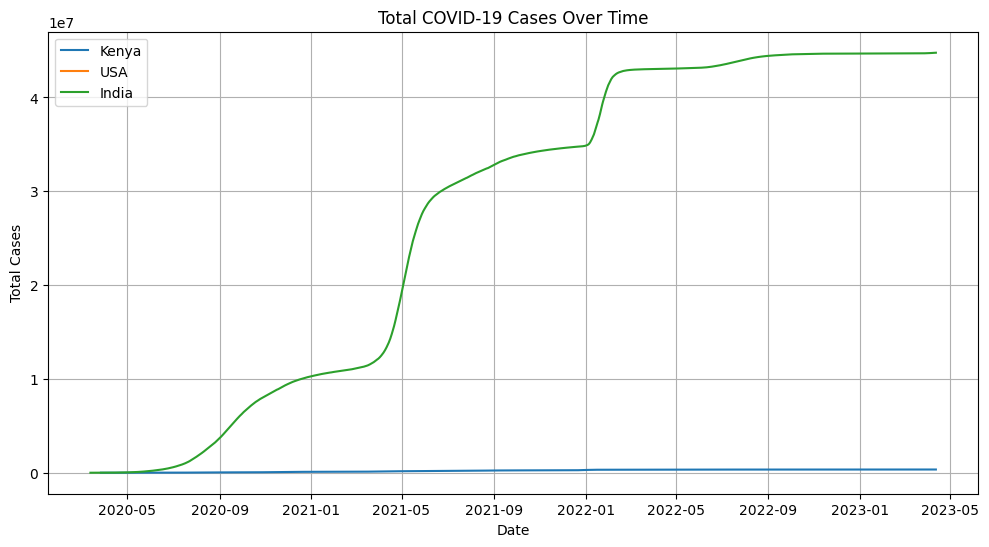

In [6]:
# Exploratory Data Analysis (EDA)
## Total Cases Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


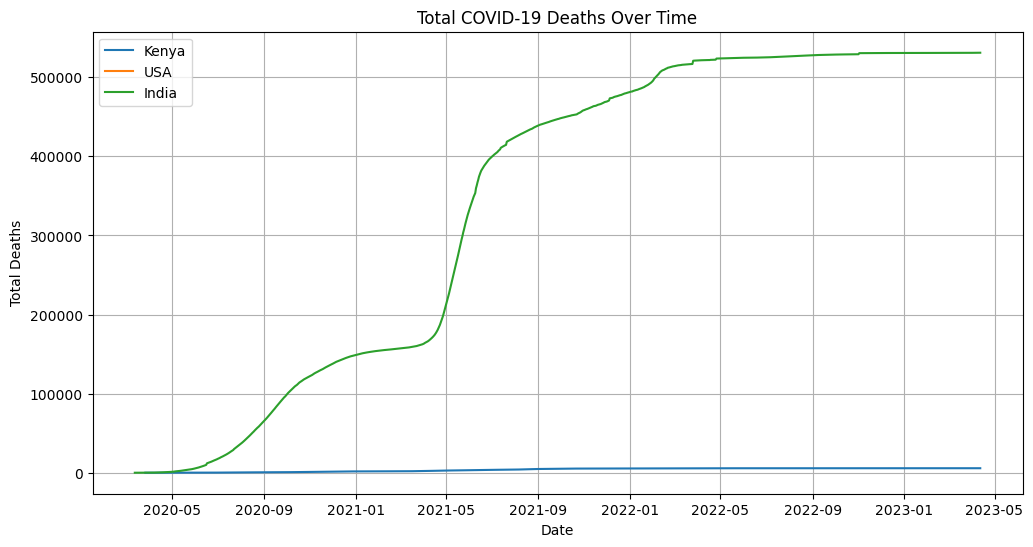

In [7]:
##  Total Deaths Over Time
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


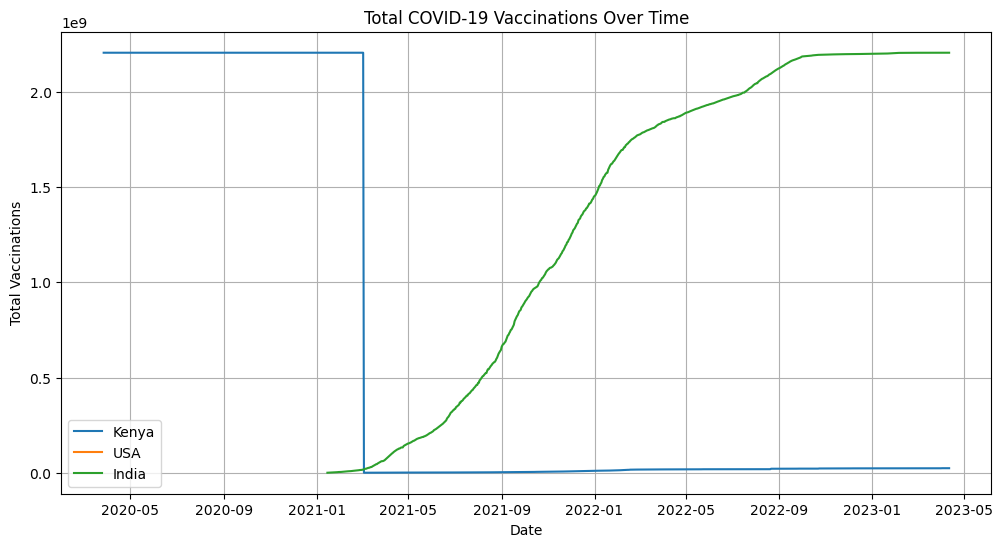

In [8]:
# Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
## Key Insights & Analysis Summary

The USA has the highest number of cases and vaccinations.

India saw a rapid increase in cases around mid-2021.

Kenya vaccination rollout started later and is still scaling up.

Death rates differ across countries due to healthcare capacity and timing.

<class 'SyntaxError'>: invalid syntax (<ipython-input-13-3aad8e2584af>, line 2)